In [ ]:
#Decision Tree

In [ ]:
#Loan Repayment Prediction using Decision Tree

In [ ]:
#Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

In [3]:
# Load DataSet
df = pd.read_csv("Loans_Dataset.csv")

#first few rows
df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [4]:
# Basic info
print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

Shape: (1004, 6)

Data types:
initial_payment     int64
last_payment        int64
credit_score        int64
house_number        int64
sum                 int64
result             object
dtype: object

Missing values per column:
initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64


In [ ]:
# No missing values 

In [ ]:
# Exploring Data

In [5]:
# Count of 'result' classes
df['result'].value_counts()

result
No     521
yes    483
Name: count, dtype: int64

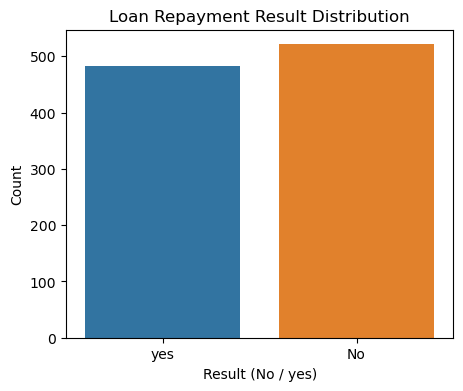

In [6]:
# Bar plot of the target variable
plt.figure(figsize=(5,4))
sns.countplot(x='result', data=df)
plt.title("Loan Repayment Result Distribution")
plt.xlabel("Result (No / yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
#Summary Statistics 

In [7]:
df.describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,4041.282869,17744.012948
std,115.844218,1442.134231,259.681745,618.431417,9594.659715
min,100.000000,10005.000000,100.000000,3003.000000,13515.000000
25%,195.750000,11213.500000,302.750000,3546.500000,16081.250000
50%,290.000000,12467.000000,518.000000,4046.000000,17383.000000
75%,398.000000,13690.000000,755.000000,4508.750000,18608.250000
max,500.000000,14999.000000,997.000000,9876.000000,246789.000000


In [ ]:
#The summary statistics show that all columns have 1004 entries with no missing values, and the financial features (initial payment, last payment, credit score, and total loan amount) vary widely across customers, indicating diverse loan and credit profiles in the dataset.

In [ ]:
#Histograms of features

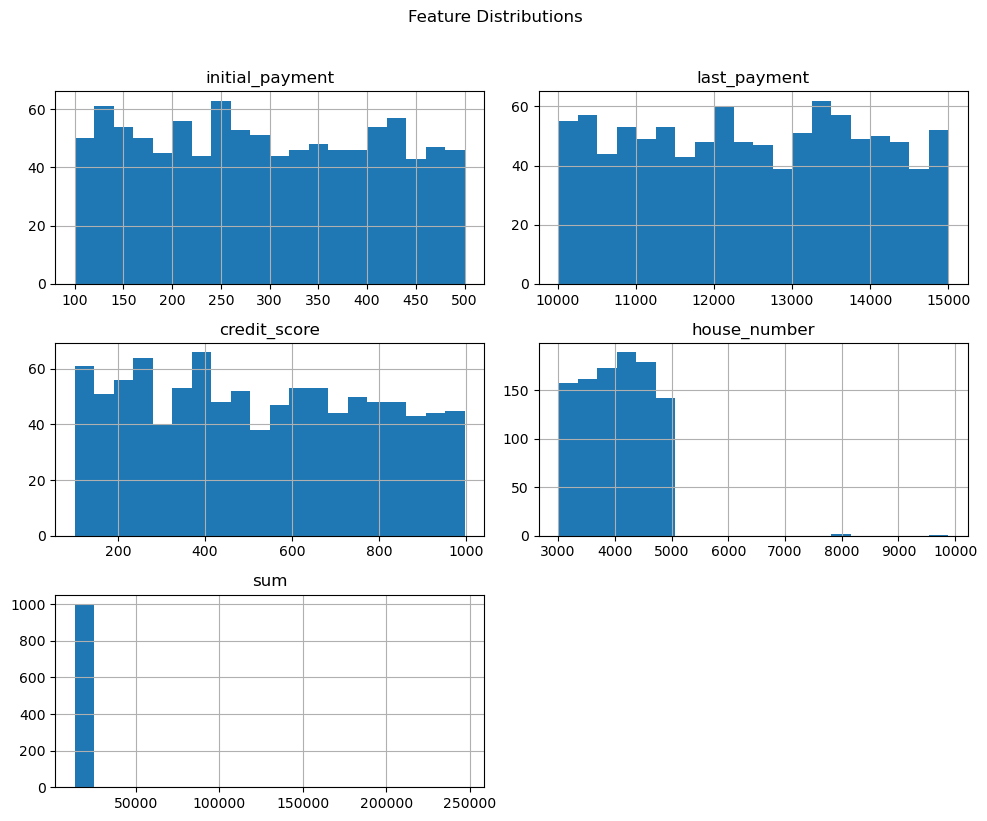

In [8]:
numeric_cols = ['initial_payment', 'last_payment', 'credit_score', 'house_number', 'sum']

df[numeric_cols].hist(figsize=(10, 8), bins=20)
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

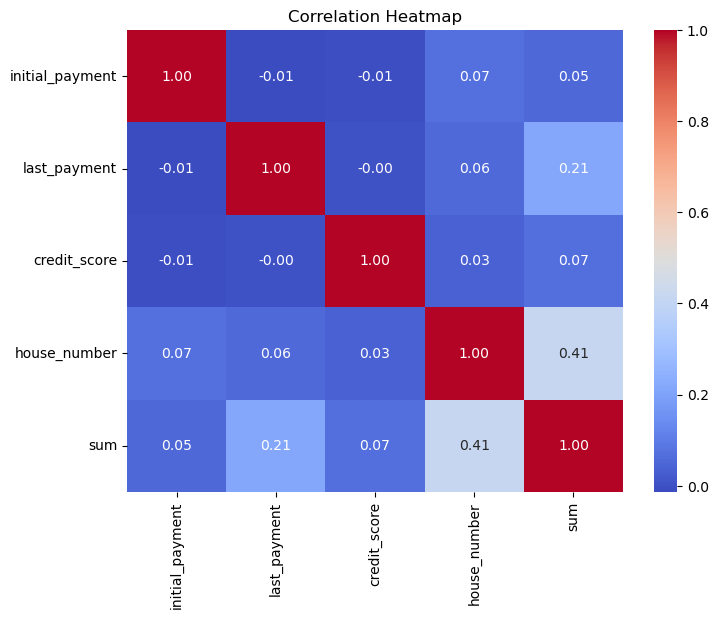

In [9]:
#Correlation heatmap
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
#Data Preprocessing
# Encode target: map 'No' -> 0, 'yes' -> 1
df['result_encoded'] = df['result'].map({'No': 0, 'yes': 1})

# Features and target
X = df[numeric_cols]
y = df['result_encoded']

# Train-test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (803, 5)
Test shape: (201, 5)


In [11]:
# Feature scaling (normalization)
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [13]:
# Modeling Decision Tree
# Training our model 
dt_clf = DecisionTreeClassifier(
    criterion='gini',
    # small depth to avoid overfitting
    max_depth=4,      
    random_state=42
)

dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [15]:
#Predictions 
y_pred = dt_clf.predict(X_test_scaled)
print(y_pred)

[1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1]


In [ ]:
#Evaluation of the Model

In [17]:
#Accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 1.0000
Accuracy: 100.00%


In [18]:
#Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       104
         Yes       1.00      1.00      1.00        97

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



In [19]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[104,   0],
       [  0,  97]])

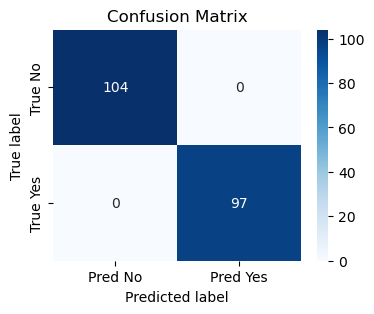

In [20]:
# Plot confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Pred No', 'Pred Yes'],
            yticklabels=['True No', 'True Yes'])
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [21]:
# Feature importance
importances = dt_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': numeric_cols,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_df

,feature,importance
4,sum,0.981886
3,house_number,0.014789
1,last_payment,0.003326
0,initial_payment,0.000000
2,credit_score,0.000000


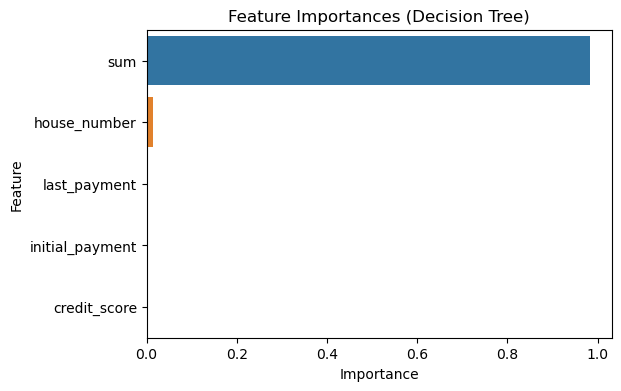

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#The model achieved 100% accuracy on the test set.
#This is likely because the dataset has a strong and easily separable pattern — the feature ‘sum’ alone accounts for over 98% of model decisions — making the loan repayment outcome perfectly predictable.